In [1]:
#Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [2]:
#Loading my dataset
data = pd.read_csv('game_details_with_counts.csv')

#Selecting quantitative columns for PCA
quant_data = data[['min_players', 'max_players', 'min_playtime', 'max_playtime', 
                   'min_age', 'users_rated', 'average_rating', 'category_count', 
                   'mechanic_count']] 

#Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(quant_data)

#Performing PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(normalized_data)

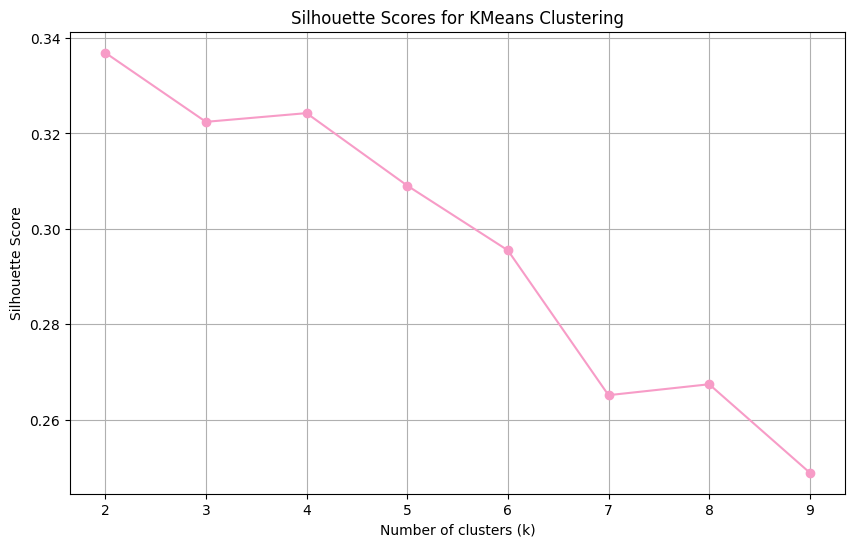

In [5]:
#KMeans Clustering with Silhouette Method
silhouette_scores = []
k_values = range(2, 10)  # Choose a range for k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_result)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)

#Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='#f79cc7')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

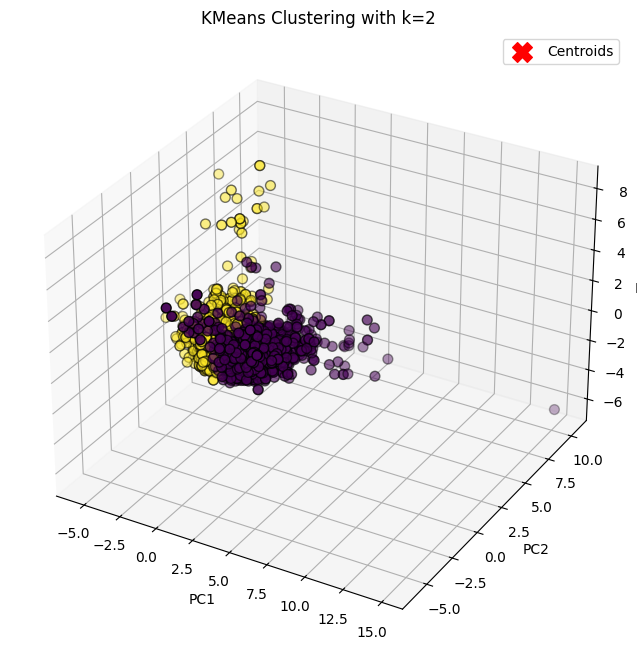

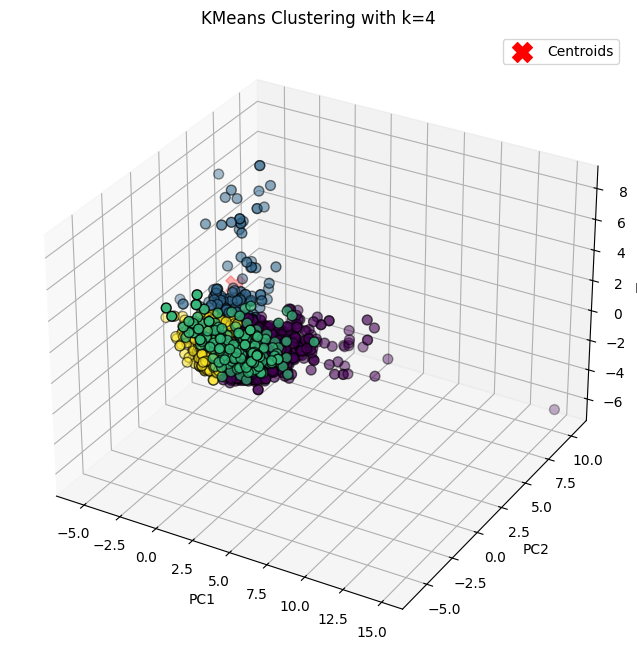

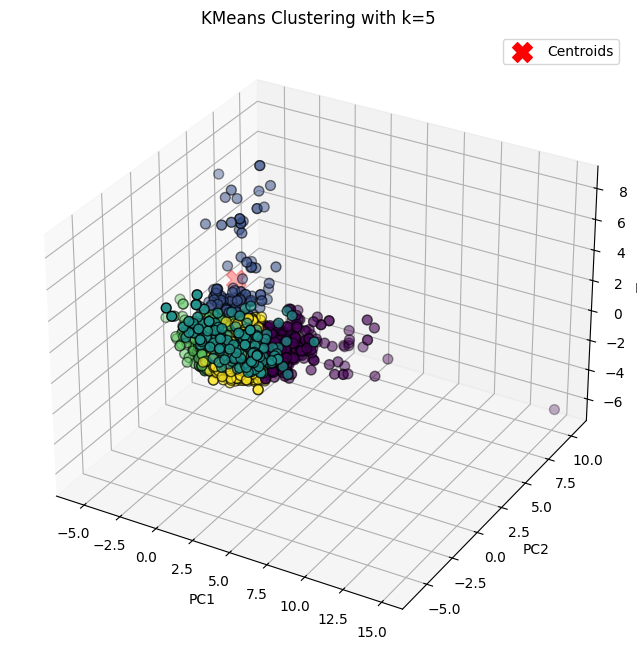

In [6]:
#Choosing three smart values of k from the silhouette score plot
chosen_k_values = [2, 4, 5] 


#Plotting KMeans Clustering Results
for k in chosen_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    centroids = kmeans.cluster_centers_

    #Creating a 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
               c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
    
    #Plotting centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='red', marker='X', s=200, label='Centroids')
    
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.legend()
    plt.show()
